In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator # TONOTE: A tool in Keras (a deep learning library) that helps load and augment image data for training the model
import matplotlib.pyplot as plt
import tensorflow_hub as hub # TONOTE: tensorflow_hub is a library for TensorFlow allowing us to reused pre-trained models in our projects. It provides a simple way to download and use pre-trained models, such as BERT, MobileNet, and more, in our own TensorFlow applications.
import tensorflow as tf
from PIL import Image # TONOTE: Python Image Library, a.k.a., Pillow package, allows us to open, close, and manipulate images
import cv2 # TONOTE: Package to manipulate images in a better and more advanced way

keras = tf.keras

In [ ]:
## TONOTE: To apply transfer learning, we use the tensorflow_hub package, which currently works with tensorflow version 2.15.0 or lower. Make sure the version of tensorflow is 2.15.0
print(tf.__version__)


2.15.0


In [ ]:
# Install tensorflow if its version is not 2.15.0
# !pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 114.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0
  Attempting uninstall: tensorboard
    Found existing installatio

In [ ]:
# Create a datasets directory in google drive
# !mkdir -p datasets

In [ ]:
# Check the file type of all files after uploading them to google drive session

# !file cherry.zip
# !file raspberry.zip

cherry.zip: Zip archive data, at least v2.0 to extract, compression method=deflate


In [ ]:
# # Unzip all files in the google drive directory /content/datasets/
# !unzip cherry.zip -d /content/datasets
# !unzip raspberry.zip -d /content/datasets

%unzip ../../../assets/files/cherry_raspberry/training/cherry.zip
%unzip ../../../assets/files/cherry_raspberry/training/raspberry.zip

Archive:  cherry.zip
  inflating: /content/datasets/cherry/1724852923-09186300 copy.jpg  
  inflating: /content/datasets/cherry/1724852923-09186300.jpg  
  inflating: /content/datasets/cherry/201412_Yarra_Valley_Cherries_Farm_0B5A0379.jpg  
  inflating: /content/datasets/cherry/20211214_suttons_cherry_stella copy.jpg  
  inflating: /content/datasets/cherry/20211214_suttons_cherry_stella.jpg  
  inflating: /content/datasets/cherry/2048x1365-SEO-Morello-cherry-GettyImages-1330319873-e389763.jpg  
  inflating: /content/datasets/cherry/23_750x810.jpg  
  inflating: /content/datasets/cherry/280.jpg  
  inflating: /content/datasets/cherry/511toBYXgWL.jpg  
  inflating: /content/datasets/cherry/51cRWnGNHbL-_AC_UF894-1000_QL80_.jpg  
  inflating: /content/datasets/cherry/61p-f3yP33L.jpg  
  inflating: /content/datasets/cherry/640px-Cherry_season_-48216568227-.jpg  
  inflating: /content/datasets/cherry/Air-Flown-1-Pack-x-USA-Cherry-500GPack-Stone-Fruits_medium copy.jpg  
  inflating: /content/

In [ ]:
# Data Augmentation
## TONOTE: Data augmentation is a technique used to artificially increase the size of a training dataset by creating modified versions of existing images. This helps to improve the model's ability to generalize and prevent overfitting.
datagen = ImageDataGenerator(
    rescale=1. / 255, # TONOTE: Rescale the pixel values of the images to a range of 0 to 1. This is a common preprocessing step for deep learning models. Not to be confused with resizing the image's physical size!
    rotation_range = 10, # TONOTE: Randomly rotate the images by up to 10 degrees.
    width_shift_range=0.15, # TONOTE: Shift the images horizontally by up to 15% of the width.
    height_shift_range=0.15, # TONOTE: Shift the images vertically by up to 15% of the height.
    shear_range=5, # TONOTE: Apply random shearing transformations to the images.
    zoom_range=[0.7, 1.3], # TONOTE: Randomly zoom in or out of the images, with a zoom range of 0.7 to 1.3.
    validation_split=0.2 # TONOTE: Specify that 20% of the data will be used for validation. Which this setting, we need to specify the validation_data when using `model.fit` for training
)
datagen

In [ ]:
# TONOTE: Create datagen_train, datagen_val instances from datagen using subset='training' and subset='validation', respectively

# # Google Colab
# datagen_train = datagen.flow_from_directory( # TONOTE: A method of the ImageDataGenerator class used to load images from a local directory
#     '/content/datasets',
#     target_size=(224, 224), # TONOTE: Specify the size to which all images will be resized. In this case, each image will be resized to 224 pixels wide and 224 pixels tall, as required by the Pre-trained MobilNetV2 model
#     batch_size=32, # TONOTE: Control how many images are fed to the model at once during training. A batch size of 32 means that 32 images will be processed before the model's weights are updated.
#     shuffle=True, # TONOTE: This indicates that the order of images within each batch should be randomized. Shuffling helps to prevent the model from learning patterns based on the order of the data.
#     subset='training' # TONOTE: Split the dataset into training and validation sets. Because we previously set validation_split=0.2 within the datagen object, this means that 80% of the images are assigned to datagen_train for training, and the remaining 20% are assigned to datagen_val for validation.
# )



# VS Code Jupyter Notebook
from pathlib import Path
notebook_path = Path.cwd()
target_dir = 'ai_practice'
project_root = ''

for parent in notebook_path.parents:
    if parent.name == target_dir:
        project_root = parent
        break

dataset_dir = project_root / 'assets/files' / 'cherry_raspberry/training'

datagen_train = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32, 
    shuffle=True, 
    subset='training'
)

datagen_val = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    subset='validation'
)

Found 734 images belonging to 2 classes.
Found 182 images belonging to 2 classes.


In [ ]:
datagen_train

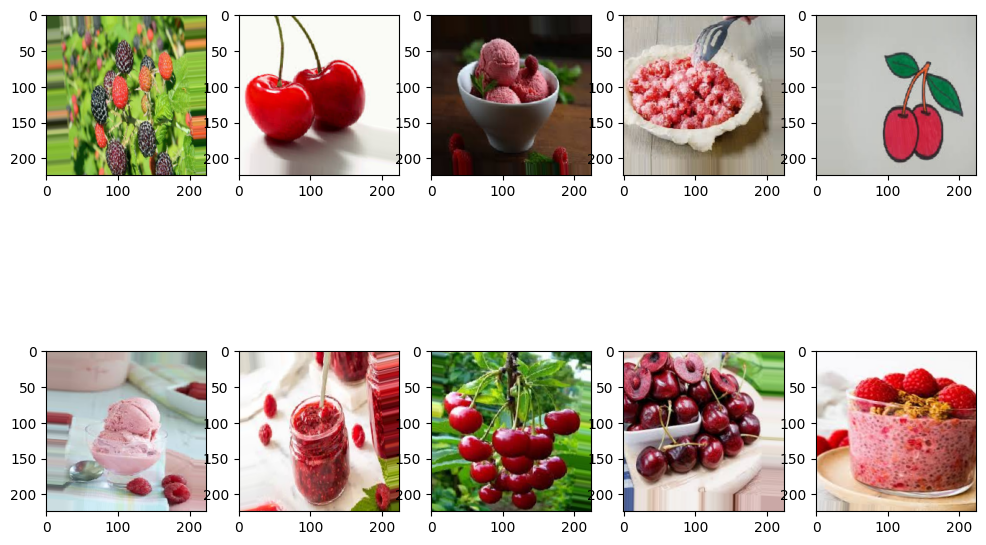

In [ ]:
# Visualize 10 images from the first batch

plt.figure(figsize=(12, 8))
for images, labels in datagen_train:
  for i in range(10): # Simply show 10 images from the first batch
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i])
  break # Since we only need a quick example, just let it access the first batch

plt.show()

In [ ]:
# Load the Pre-trained mobilenet-v2 model

## URL of the pre-trained mobilenet-v2 model
url = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

## TONOTE: Use hub.KerasLayer to download and create a Keras Layer based on the above `url`
mobilenetV2 = hub.KerasLayer(url, input_shape=(224, 224, 3))
## TONOTE: `input_shape=(224, 224, 3)` specifies the expected shape of the input images: 224 pixels wide, 224 pixels tall, and 3 color channels (RGB). This means the model is designed to work with images of this size.
## TONOTE: Why (224, 224, 3)? It's a requirement of the pre-trained MobilNetV2 model, and the ImageDataGenerator with `target_size=(224, 224)` handles the resizing of our local images to meet this requirement.
mobilenetV2


In [ ]:
# TONOTE: Freeze the pre-trained layer so that features of its original training, including hyperparameters and others, are not affected. We will only train it with our part
mobilenetV2.trainable = False

In [ ]:
# TONOTE: Create the model using transfer learning (the pre-trained model followed by a dense output layer). Ensure that the tensorflow version must be 2.15.0 or lower.
model = keras.Sequential([ # TONOTE: The Sequential model is a linear stack of layers, meaning the output of one layer becomes the input of the next.
    mobilenetV2, # TONOTE: Use the pre-trained MobilNetV2 model's knowledge as a foundation.
    keras.layers.Dense(2, activation='softmax') # TONOTE: The 'softmax' activation function is an algorithm, it's commonly used in the output layer of a neural network when the task is a multi-class classification problem. It takes the output of the previous layer and maps it to a probability distribution over all classes. In this specific case, the output layer has 2 units (i.e., Dense(2, ...)), which means the model is predicting the probability of each of the two classes (cherry and raspberry). The softmax function ensures that the output of these two units is normalized to form a probability distribution, where the probabilities add up to 1.
])

In [ ]:
# TONOTE: The softmax function is defined as:
# `softmax(x) = exp(x) / Σ exp(x)`
# where x is the input to the softmax function, and exp(x) is the exponential function applied to x.
# By using softmax, the model outputs a probability distribution over the two classes, which can be interpreted as:
# # - The probability of the input image being a cherry
# # - The probability of the input image being a raspberry
# This allows the model to make a prediction by selecting the class with the highest probability.
# It's worth noting that the softmax function is often used in conjunction with the categorical cross-entropy loss function, which is also used in this model (as seen in the model.compile line). This loss function is specifically designed for multi-class classification problems and is optimized by the softmax output.

In [ ]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train the model

EPOCHS = 20

history = model.fit(
    datagen_train,
    epochs=EPOCHS,
    batch_size = 32,
    validation_data=datagen_val
)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


23/23 [==============================] - 45s 2s/step - loss: 0.4957 - accuracy: 0.7452 - val_loss: 0.3395 - val_accuracy: 0.8516
Epoch 2/20
23/23 [==============================] - 39s 2s/step - loss: 0.2402 - accuracy: 0.9033 - val_loss: 0.2728 - val_accuracy: 0.8846
Epoch 3/20
23/23 [==============================] - 40s 2s/step - loss: 0.1789 - accuracy: 0.9373 - val_loss: 0.2327 - val_accuracy: 0.9066
Epoch 4/20
23/23 [==============================] - 39s 2s/step - loss: 0.1568 - accuracy: 0.9428 - val_loss: 0.1874 - val_accuracy: 0.9286
Epoch 5/20
23/23 [==============================] - 40s 2s/step - loss: 0.1441 - accuracy: 0.9455 - val_loss: 0.1929 - val_accuracy: 0.9176
Epoch 6/20
23/23 [==============================] - 40s 2s/step - loss: 0.1225 - accuracy: 0.9564 - val_loss: 0.1602 - val_accuracy: 0.9451
Epoch 7/20
23/23 [==============================] - 38s 2s/step - loss: 0.1110 - accuracy: 0.9605 - val_loss: 0.1535 - val_accuracy: 0.9505
Epoch 8/20
23/23 [=============

In [ ]:
# Create a function to test the model

def categorizer(img_path):
  img = Image.open(img_path)
  img = img.convert('RGB')
  img = np.array(img).astype(float) / 255
  img = cv2.resize(img, (224, 224))

  prediction = model.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediction[0], axis=-1)


path_1 = 'pexels-1.jpg' # cherry (0)
path_2 = 'pexels-2.jpg' # raspberry (1)

categorizer(img_path=path_2)

1/1 [==============================] - 0s 51ms/step


1

# Key Learning Points Analysis

Here's a chronological analysis of the concepts marked with `TONOTE` in the notebook:

## 1. Image Data Generator


In [ ]:
# TONOTE: A tool in Keras (a deep learning library) that helps load and augment image data for training the model

- **Explanation**: ImageDataGenerator is a class that generates batches of tensor image data with real-time data augmentation.
- **Importance**: Helps prevent overfitting by creating variations of training images and handles data preprocessing.
- **Example Usage**:


In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.15
)

- **Best Practices**: Use when working with limited image datasets to artificially increase variety.
- **Pitfalls**: Too aggressive augmentation can lead to unrealistic training data.

## 2. TensorFlow Hub


In [ ]:
# TONOTE: tensorflow_hub is a library for TensorFlow allowing us to reused pre-trained models in our projects

- **Explanation**: Library that enables sharing, discovering, and reusing pre-trained machine learning models.
- **Importance**: Enables transfer learning and reduces training time and resources.
- **Best Practices**: Verify compatibility with your TensorFlow version.
- **Pitfalls**: Some models might require specific TensorFlow versions.

## 3. PIL (Python Imaging Library)


In [ ]:
# TONOTE: Python Image Library, a.k.a., Pillow package, allows us to open, close, and manipulate images

- **Explanation**: Library for opening, manipulating, and saving image files.
- **Importance**: Provides essential image processing capabilities in Python.
- **Best Practices**: Always convert images to appropriate format/mode before processing.

## 4. Data Augmentation Techniques


In [ ]:
# TONOTE: Data augmentation is a technique used to artificially increase the size of a training dataset

Specific augmentation parameters:
- **Rescale**: `# TONOTE: Rescale the pixel values of the images to a range of 0 to 1`
- **Rotation**: `# TONOTE: Randomly rotate the images by up to 10 degrees`
- **Shift**: `# TONOTE: Shift the images horizontally/vertically by up to 15%`
- **Validation Split**: `# TONOTE: Specify that 20% of the data will be used for validation`

## 5. Image Size Requirements


In [ ]:
# TONOTE: Specify the size to which all images will be resized (224x224) as required by the Pre-trained MobilNetV2 model

- **Explanation**: Pre-trained models require specific input dimensions.
- **Importance**: Ensures compatibility with the model architecture.
- **Best Practice**: Always resize images to match model requirements.

## 6. Batch Processing


In [ ]:
# TONOTE: Control how many images are fed to the model at once during training

- **Explanation**: Processes multiple images simultaneously during training.
- **Importance**: Affects training speed and memory usage.
- **Best Practice**: Choose batch size based on available memory and model requirements.

## 7. Softmax Activation


In [ ]:
# TONOTE: The 'softmax' activation function is commonly used in the output layer for multi-class classification

- **Explanation**: Converts neural network outputs into probability distributions.
- **Importance**: Essential for classification tasks.
- **Example**:


In [ ]:
keras.layers.Dense(2, activation='softmax')

- **Best Practice**: Use with categorical cross-entropy loss for classification tasks.

I've focused only on explicitly marked `TONOTE` items in the notebook. Each learning point includes explanation, importance, and where applicable, examples and best practices. Let me know if you'd like me to expand on any particular point or proceed with the second section of the analysis.

## 2. Model/Process Implementation Summary

### 1. Environment Setup and Imports


In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator

- TensorFlow version requirement: 2.15.0 or lower for compatibility with TensorFlow Hub
- Key libraries: TensorFlow, TensorFlow Hub, PIL, OpenCV

### 2. Data Preparation & Augmentation


In [ ]:
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=10,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=5,
    zoom_range=[0.7, 1.3],
    validation_split=0.2
)

**Key Decisions:**
- 80/20 train/validation split
- Multiple augmentation techniques to prevent overfitting
- Images rescaled to [0,1] range

### 3. Data Loading


In [ ]:
datagen_train = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    subset='training'
)

**Parameters:**
- Image size: 224x224 (MobileNetV2 requirement)
- Batch size: 32
- Data shuffling enabled

### 4. Transfer Learning Setup


In [ ]:
url = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
mobilenetV2 = hub.KerasLayer(url, input_shape=(224, 224, 3))
mobilenetV2.trainable = False

**Key Decisions:**
- Base model: MobileNetV2
- Frozen base model weights
- Input shape: (224, 224, 3)

### 5. Model Architecture


In [ ]:
model = keras.Sequential([
    mobilenetV2,
    keras.layers.Dense(2, activation='softmax')
])

**Design Choices:**
- Simple architecture with one dense layer
- 2 output neurons (cherry/raspberry)
- Softmax activation for classification

### 6. Model Configuration


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

**Parameters:**
- Optimizer: Adam
- Loss: Categorical Cross-entropy
- Metric: Accuracy

### 7. Training Process


In [ ]:
history = model.fit(
    datagen_train,
    epochs=20,
    batch_size=32,
    validation_data=datagen_val
)

**Configuration:**
- Epochs: 20
- Batch size: 32
- Validation during training

### 8. Inference Implementation


In [ ]:
def categorizer(img_path):
    img = Image.open(img_path)
    img = img.convert('RGB')
    img = np.array(img).astype(float) / 255
    img = cv2.resize(img, (224, 224))
    prediction = model.predict(img.reshape(-1, 224, 224, 3))
    return np.argmax(prediction[0], axis=-1)

**Process:**
1. Load and convert image to RGB
2. Normalize pixel values
3. Resize to required dimensions
4. Make prediction
5. Return class index

### Key Technical Decisions Rationale

1. **Transfer Learning Choice**
   - Using pre-trained MobileNetV2 for efficient feature extraction
   - Frozen weights to preserve learned features

2. **Data Augmentation Strategy**
   - Multiple augmentation techniques to increase dataset variety
   - Moderate augmentation parameters to maintain realistic images

3. **Model Architecture**
   - Simple dense layer addition for binary classification
   - Minimal additional parameters to prevent overfitting

4. **Processing Pipeline**
   - Standardized image preprocessing
   - Consistent input shape requirements
   - Efficient batch processing

The implementation follows a standard transfer learning workflow, with particular attention to data preprocessing and augmentation to handle a potentially limited dataset of cherry and raspberry images.